# Anomly detection for IoT 

Preprocessed dataset for network based intrusion detection system in Iot Devices. 
Ultrasonic Sensor with Arduino and NodeMCU used to monitor the network and collect the network logs. 
NodeMCU with ESP8266 wifi module was used to send data to the server via wifi. 

For more detail, check [here](https://www.kaggle.com/datasets/speedwall10/iot-device-network-logs).


In [35]:
%matplotlib inline
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 22})

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans


In [36]:
df = pl.read_csv('https://cloud.hrun.duckdns.org/s/9YdoqYTGR4poZxe/download/IoT-DNL.csv')
df = df.sample(int(df.shape[0]*0.2))
df.head()

frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64
65706,125419000787443,169,110425385261001,167275820076079,1921680183,1921680121,6.0,155.0,103.0,53574.337444,80.0,-3.0,3
96170,130106893636440,271,87971959760497,167275820076079,192168035,1921680121,6.0,257.0,217.0,62102.0,80.0,2219.0,0
117112,130414331858945,98,167275820076079,110425385261001,1921680121,1921680183,1.0,84.0,0.0,0.0,0.0,-2.0,2
61329,125745649898601,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
82250,125719560955593,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,62569.0,80.0,-99.0,0


In [37]:
df.describe()

describe,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0,95485.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",52781.543729,1.2566e14,120.65293,1.2954e14,1.6050e14,8.6961e8,1.2003e9,2.867435,97.258314,60.78355,23683.366225,4581.810735,-4.32651,2.492831
"""std""",32381.637395,2.0605e12,87.784513,4.4737e13,5.0849e13,2.1281e9,3.6089e9,3.294688,96.699045,87.190443,27893.609826,15514.428001,103.058478,1.707449
"""min""",7.0,1.2372e14,42.0,3.7560e13,1.1011e12,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-99.0,0.0
"""25%""",27624.0,1.2434e14,42.0,8.7972e13,1.3245e14,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-5.0,1.0
"""50%""",46887.0,1.2490e14,98.0,1.1043e14,1.6728e14,1.92168035e8,1.9217e9,6.0,84.0,0.0,80.0,80.0,-3.0,2.0
"""75%""",77843.0,1.2565e14,176.0,1.6728e14,1.6728e14,1.9217e9,1.9217e9,6.0,162.0,110.0,54991.059181,80.0,-2.0,4.0
"""max""",125158.0,1.3051e14,1424.0,2.0707e14,2.8147e14,1.7222e11,2.5526e11,17.0,1410.0,1358.0,65534.0,65534.0,7474.0,5.0


In [38]:
df_ports = df[['tcp.dstport']]
df_ports.head(10)

df['tcp.dstport'].value_counts().sort('counts')

tcp.dstport,counts
f64,u32
50224.0,1
64583.0,1
50174.0,1
55455.0,1
61047.0,1
64602.0,1
55519.0,1
55616.0,1
51584.0,1


In [39]:
df_ports = df[['tcp.srcport']]
df_ports.head(10)

df['tcp.srcport'].value_counts().sort('counts')


tcp.srcport,counts
f64,u32
56525.187484,1
53420.217671,1
62207.035751,1
53475.834643,1
56369.939332,1
56508.463605,1
56493.167076,1
54012.0,1
53590.656757,1


In [40]:
#sns.pairplot(df.to_pandas())
#plt.show()

In [41]:
#sns.pairplot(df.to_pandas(), hue='normality')
#plt.show()

In [42]:
ports_map = {
    80:1,
    443:2,
    
    115:4,
    20:5,
    21:6,

    22:8,
    23:9,

    7:11,
    53:12,
    67:13,
    68:14,
}

def map_tcp_ports(port):
    return ports_map.get(int(port), 100)

In [47]:
#X = df.drop(['frame.number', 'frame.time', 'normality', 'tcp.srcport', 'tcp.dstport']).drop_nulls().to_numpy()
df = df.drop(['frame.number', 'frame.time', 'normality'])

#print(f'{df.describe()}')

df.with_columns(
    pl.col('tcp.srcport')
    .map_dict(ports_map, default=100)
    .alias('tcp.srcport'))

df.with_columns(
    pl.col('tcp.dstport')
    .map_dict(ports_map, default=100)
    .alias('tcp.dstport'))
#print(f'{df.describe()}')

#y = df[['normality']].drop_nulls().to_numpy()
#X

frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value
i64,i64,i64,i64,i64,f64,f64,f64,i64,f64,f64
169,110425385261001,167275820076079,1921680183,1921680121,6.0,155.0,103.0,100,80.0,-3.0
271,87971959760497,167275820076079,192168035,1921680121,6.0,257.0,217.0,100,80.0,2219.0
98,167275820076079,110425385261001,1921680121,1921680183,1.0,84.0,0.0,100,0.0,-2.0
42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,100,0.0,-5.0
54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,100,80.0,-99.0
62,167275820076079,87971959760497,1921680121,192168035,6.0,48.0,0.0,1,54526.0,-99.0
288,167275820076079,87971959760497,1921680121,192168035,6.0,274.0,234.0,1,61893.0,-99.0
42,87971959760497,281474976710655,0,0,-1.0,0.0,0.0,100,0.0,-5.0
268,87971959760497,167275820076079,192168035,1921680121,6.0,254.840887,214.840887,100,80.0,11.52266


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.74512937, -0.92229686,  0.12686458, ..., -0.58252828,
        -0.68488704, -0.0164914 ],
       [-0.87952902, -2.04786255,  0.12686458, ..., -0.99043482,
        -0.68488704, -0.0031627 ],
       [-0.87952902, -0.42097448,  0.12686458, ..., -0.99043482,
        -0.68488704, -0.0031627 ],
       ...,
       [-0.87952902,  0.8483372 ,  0.57357151, ..., -0.99043482,
        -0.68488704, -0.0031627 ],
       [ 0.62126708,  1.35401471,  0.12686458, ...,  0.66158669,
         0.55536894, -0.0030224 ],
       [-0.87952902,  0.8483372 , -1.43728348, ..., -0.99043482,
        -0.68488704, -0.00330301]])

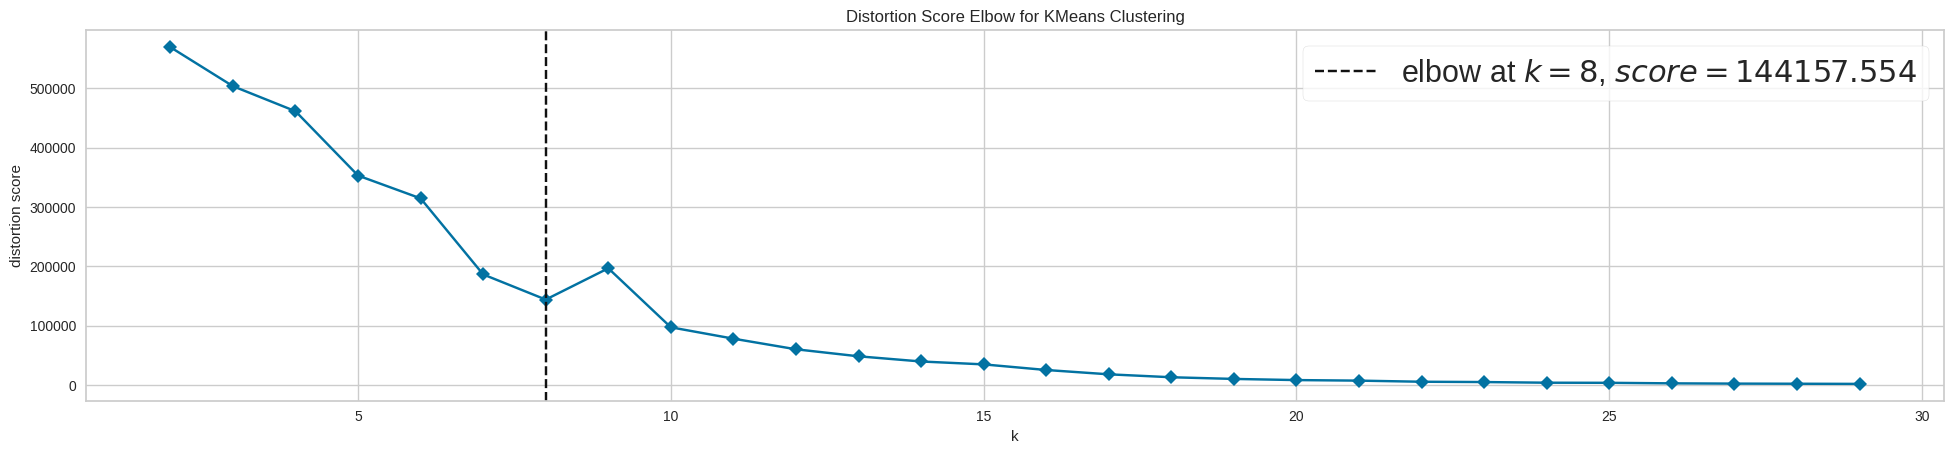

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2, 30), timings=False)

visualizer.fit(X_scaled)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

In [ ]:
k=8
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(X)
distances = kmeans.transform(X)
cluster_indices = kmeans.labels_

In [ ]:
mask = (cluster_indices[:, None] == np.arange(distances.shape[1]))
distances[~mask] = 0

dictionary = {i: column for i, column in enumerate(zip(*distances))}

mean_distances = [sum(values) / len(values) for key, values in dictionary.items()]
thresholds = np.array(mean_distances)  # thresholds als NumPy-Array anpassen

print(f'thresholds: {thresholds}')

outliers = np.any(np.array(distances) > thresholds, axis=1)  
print(f'{outliers}')

thresholds: [0.00000000e+00 5.73731240e+11 2.53916975e+12 1.13807915e+05
 1.02191708e+11 2.34951699e+09 7.42269727e+07 6.14761977e+10]
[ True  True  True ...  True False  True]


In [ ]:
filtered_outlier = y[outliers]

filtered_labels = filtered_outlier[filtered_outlier != 0]

count = (len(filtered_outlier) - len(filtered_labels)) / len(filtered_outlier)

print(f'Accuracy:{count}')

Accuracy:0.19970064399275508
